In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np


In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\EdSigh Ed-Tech (7).csv")
df.head()

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,4/7/2013,Free
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,12/25/2013,Free
3,151668,29167,Introduction to Financial Modeling,0,1463,8,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,5/27/2014,Free
4,648826,24481,The Complete Financial Analyst Course 2017,195,2347,174,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,1/21/2016,Paid


In [33]:
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

In [35]:
df.describe()

,Course_ID,Num_Subscribers,Price,Num_Review,Num_Lectures,Rating,Content_Duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,3199.260881,66.115343,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,9486.582966,61.056073,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,112.000000,20.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,912.500000,45.000000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,2558.000000,95.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,268923.000000,200.000000,27445.000000,779.000000,1.000000,78.500000


In [36]:
print(df.isnull().sum())

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64


There is no missing data

In [ ]:
#EXPLORATORY DATA ANALYSIS
UNIVARIATE ANALYSIS

In [38]:
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

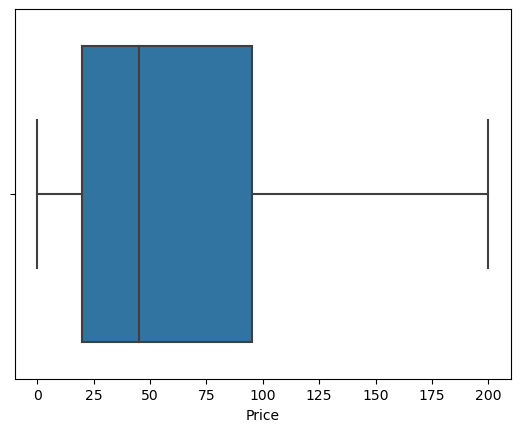

In [40]:
sns.boxplot(x=df['Price']);

There are no outliers in the prices of courses at Edsigh. Concentration of prices range from 25 to 100 dollars, the minumum price at 0 and maximum price at 200 dollars.

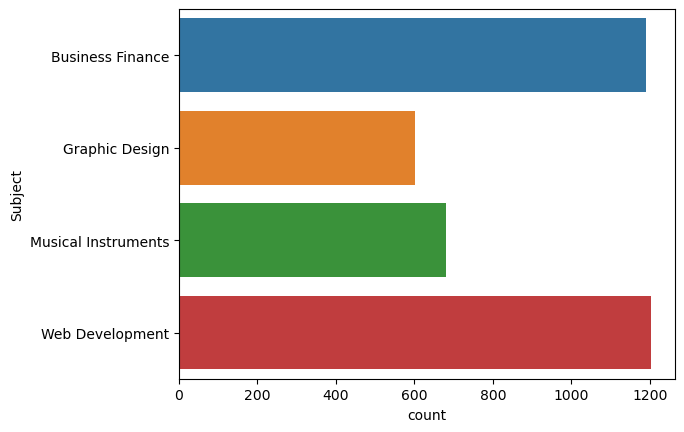

In [56]:
sns.countplot(y='Subject',data=df);


We have 1200 students enrol for Web Development , followed closely by Business Finance and Graphics Design had the lowest numbers of close to 600 students.

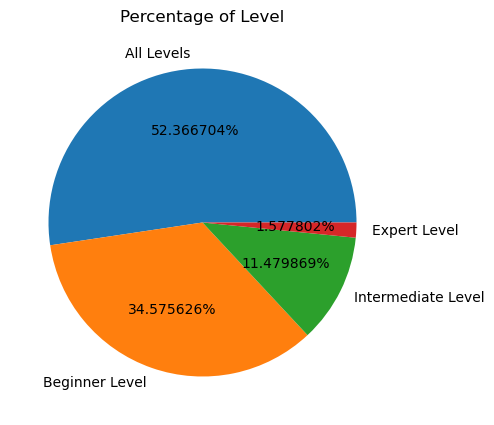

In [57]:
fig,ax=plt.subplots(figsize=(5,5))
count= Counter(df['Level'])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:2f}%')
ax.set_title('Percentage of Level')
plt.show();

All level has the highest percentage of 52.3%, followed by 34.5% for the Beginner level, the intermediate level is at 11.4% while the lowest percentage is that of the Experts at 1.5%

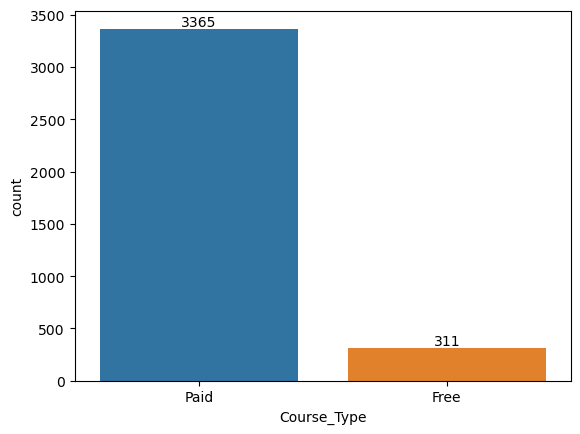

In [58]:
ax=sns.countplot(x=df['Course_Type'],order=df['Course_Type'].value_counts(ascending=False).index)
ax;
values=df['Course_Type'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


A majority of the course types are paid for totalling 3365 while 311 courses are free.This should be good for the revenue of Edsigh Ed-Tech. I would advise that the free classes are given as some form of rewards either when students bring referals, so that way its a win-win situation for both parties.

In [7]:
#Group Rating
def Rating_grp(x):
    if x <=0:
        return 'Bad Rating'
    elif x <=0.5:
        return 'Fair Rating'
    elif x <=1:
        return 'Good Rating'
    
    #Apply fuction to the data
df['Rating_grp']= df['Rating'].apply(Rating_grp)
df.head(5)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Rating_grp
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free,Good Rating
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,4/7/2013,Free,Good Rating
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,12/25/2013,Free,Good Rating
3,151668,29167,Introduction to Financial Modeling,0,1463,8,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,5/27/2014,Free,Fair Rating
4,648826,24481,The Complete Financial Analyst Course 2017,195,2347,174,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,1/21/2016,Paid,Fair Rating


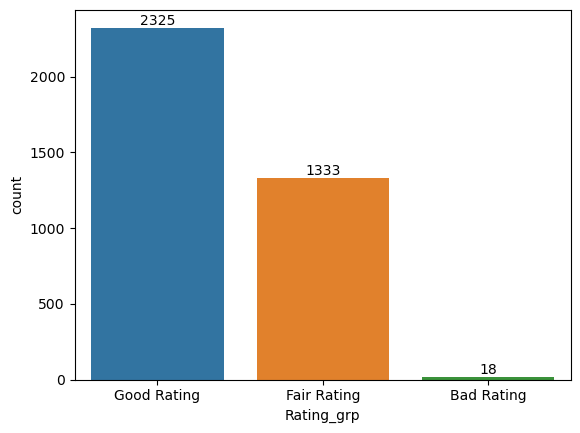

In [10]:
ax=sns.countplot(x=df['Rating_grp'],order=df['Rating_grp'].value_counts(ascending=False).index)
ax;
values=df['Rating_grp'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


The Rating has been grouped into 3 categories. The Good rating has the highest category of 2325 which is good for Edsigh Ed Tech, then the Fair Rating is next totalling 1333 and just 18 Bad rating from the learners.There should be further enquiry frm the 18 learners on what they want to see improved for a better rating.

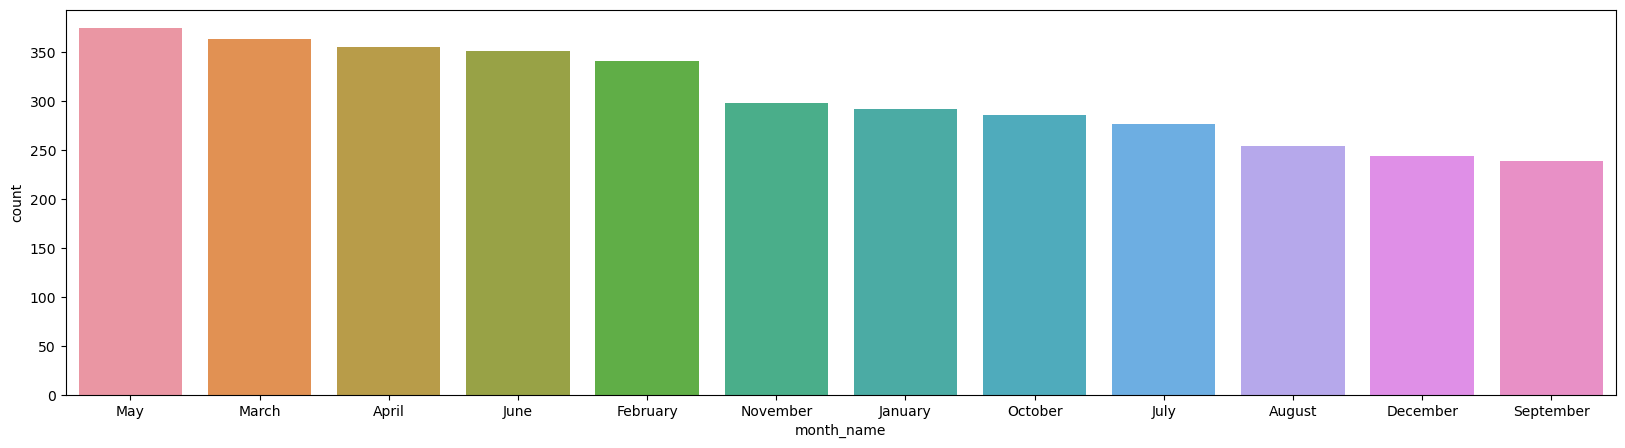

In [15]:
#Total transaction by Months
plt.figure(figsize=(20,5))

toptwelve=df['month_name'].value_counts().head(12)

sns.countplot(x='month_name',data=df, order=toptwelve.index);


September and December have the lowest counts of learnersthis could be attributed to new academic session and festive holidays,more online marketing campaigns should be done, and targetted at the right audience.
May has the highest count , followed by March and April.

In [ ]:
#Bi-Variate Analysis

In [4]:
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

Text(0.5, 1.0, 'Content_Duration and Price')

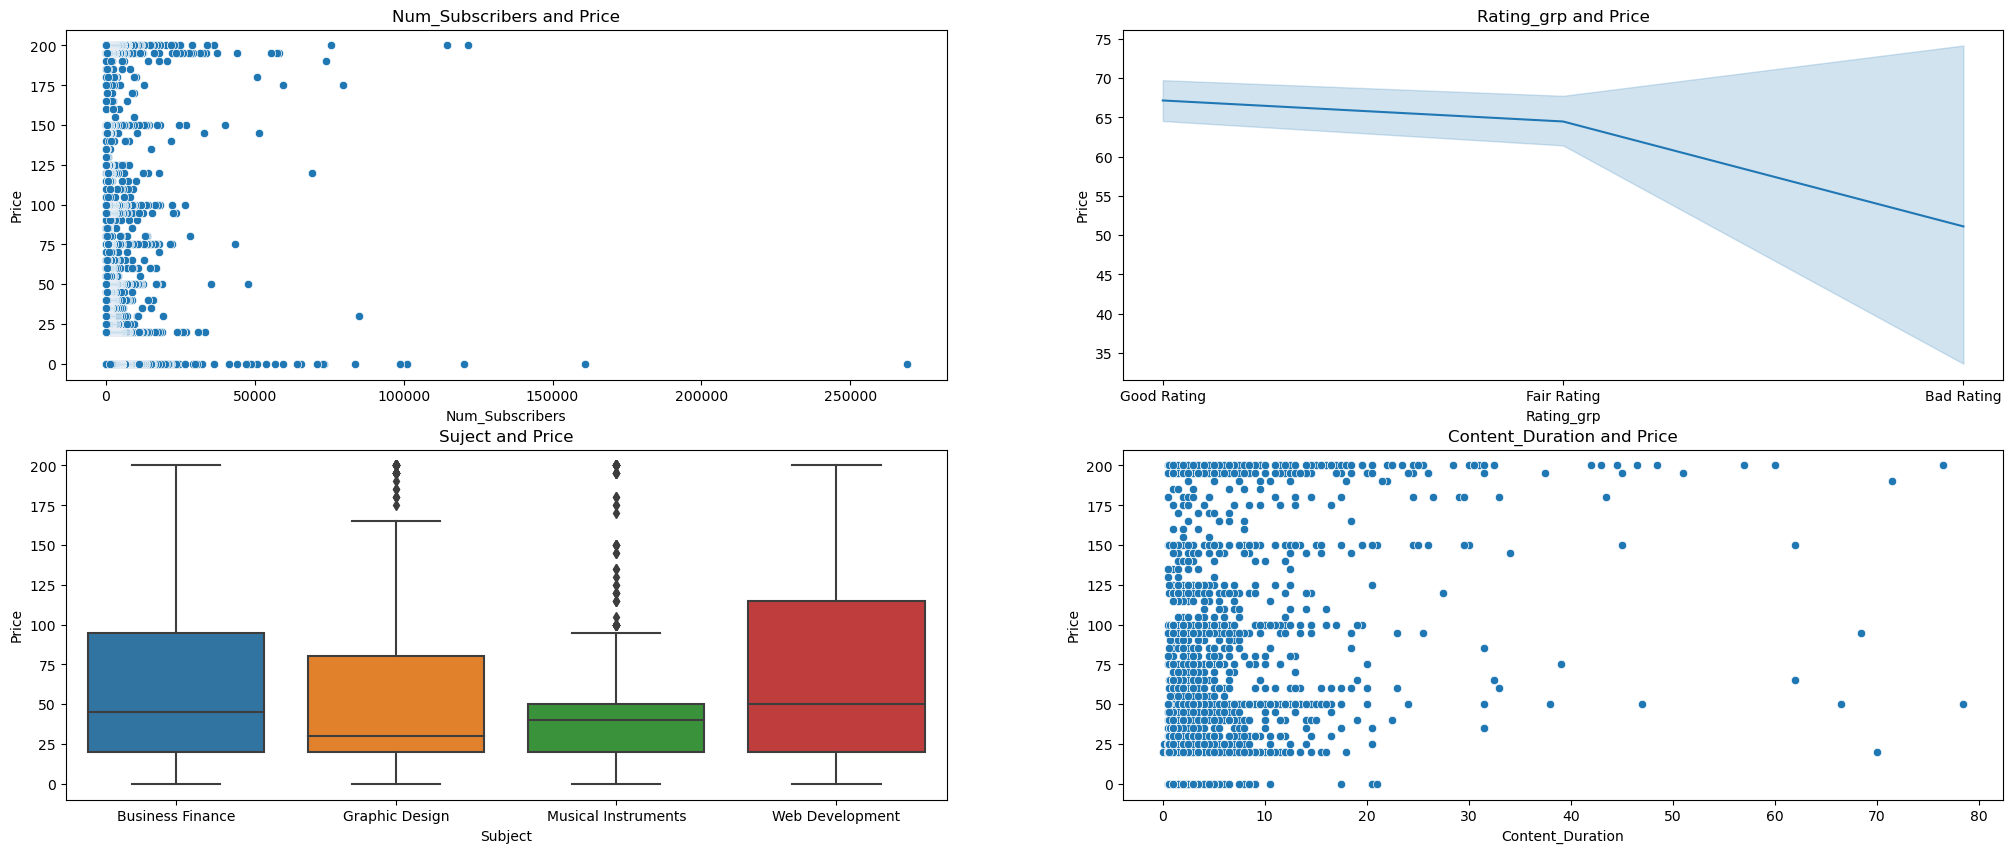

In [12]:
fig,axs =plt.subplots(nrows=2,ncols=2, figsize=(25,10))
sns.scatterplot(x='Num_Subscribers',y='Price',data=df,ax=axs[0,0])
axs[0,0].set_title('Num_Subscribers and Price')

sns.lineplot(x='Rating_grp',y='Price',data=df,ax=axs[0,1])
axs[0,1].set_title('Rating_grp and Price')

sns.boxplot(x='Subject',y='Price',data=df,ax=axs[1,0])
axs[1,0].set_title('Suject and Price')

sns.scatterplot(x='Content_Duration',y='Price',data=df,ax=axs[1,1])
axs[1,1].set_title('Content_Duration and Price')




From the 1st graph of Number of subcribers and price, we can denote that majority of its subscriber numbers is btw 0-50,000 , with the highest price 200 dollars having more concentration, with a few outliers in the price 0 which is free.
From the 2nd graph, the rating is grouped (Good, Fair and Bad rating) and its relationship with the price. The good and fair rating courses have high prices. while the courses with bad rating have lower prices. Learners are ready to pay even high prices as long as they get value.
From the 3rd graph, we clearly see Subjects and the Prices, and it canbe clearly concluded that Web Development has the highest prices,followed by Business Finance,next is the Graphics Design and the Musical Instruments has the lowest prices
From the 4th graph, the relationship btw the content duration and price.There is more concentration of content duration from 0-20mins for all the various prices available. It can also be noticed a lot of outliers across the graph. 

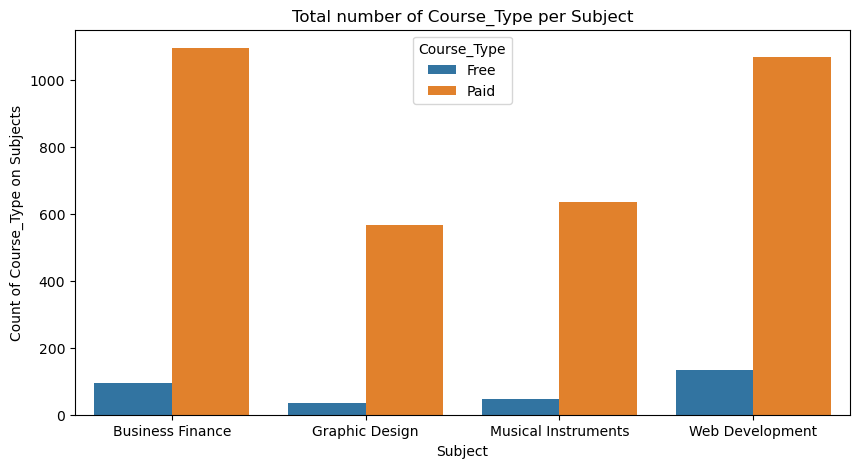

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Subject',data=df,hue='Course_Type')
plt.xlabel('Subject')
plt.ylabel('Count of Course_Type on Subjects')
plt.title('Total number of Course_Type per Subject');

Business Finance is the highest paid subject,followed by Web Development, and Graphic Design is the least paid subject. While the free courses are generally low (100 and less)across all the subjects with web development topping the free course types and graphics design still as the least even for free.

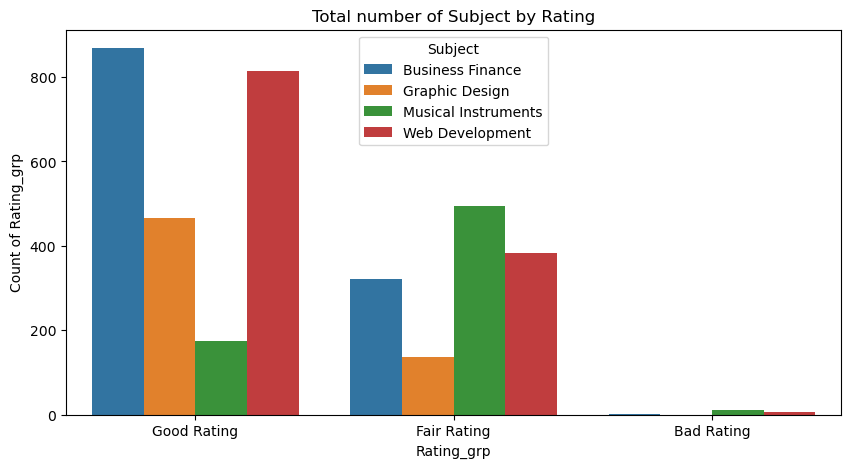

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating_grp',data=df,hue='Subject')
plt.xlabel('Rating_grp')
plt.ylabel('Count of Rating_grp')
plt.title('Total number of Subject by Rating');

The relationship btw the subjects and their rating groups shows clearly that the Business Finance and Web Development have the highest good ratings. I will recommend Musical Instrumentand Graphic Design will need to be revamped, get feedback from the learners to improve both subjects, in terms of getting more paid learners and higher ratings.There were no significant bad ratings.

Rating vs the prices, the least prices from 0-20 seem to have good ratings while the higher and expensive price that would yield more revenue have very low price count. There is really no significant Bad rating in Edsigh Tech which is commendable. More effort has to be on increaseing the price counts for the expensive and high priced courses. 

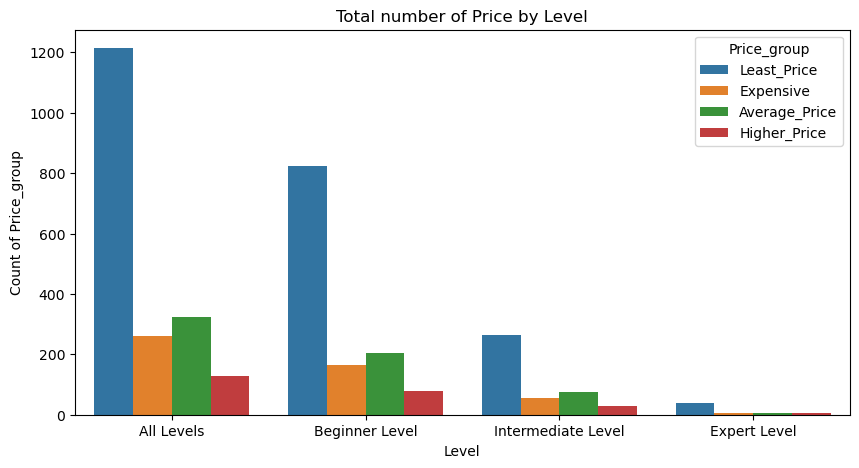

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Level',data=df,hue='Price_group')
plt.xlabel('Level')
plt.ylabel('Count of Price_group')
plt.title('Total number of Price by Level');

The relationship btw the level and Prices,the 3 levels (All levels,Beginner Level,Intermediate level) all have the highest counts for the Price (least_price $50 and below). That cannot help to increase revenue generated in Edsigh Ed-Tech. The prices will need to be reviewed especially for the 2 high demand subjects(Business Finance & Web Development).
Also it can be noticed that both the Intermediate and Expert level

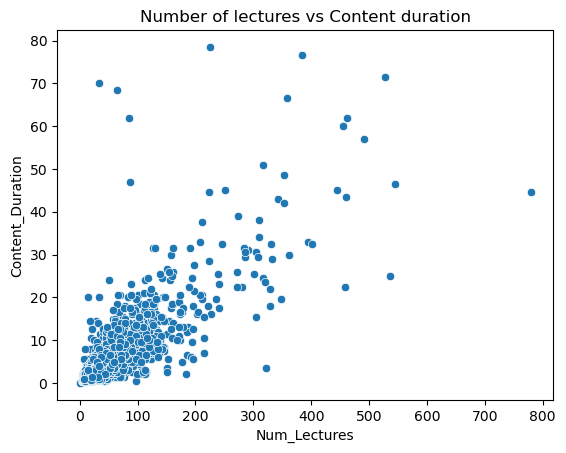

In [19]:
fig,axs = figsize=(25,10)
sns.scatterplot(x='Num_Lectures',y='Content_Duration',data=df)
plt.title('Number of lectures vs Content duration');


The relationship between the number of lectures and the content duration shows majority of the lectures (0-300) had shorter content duration of 0-50 mins. It can be said that the learners prefer shorter content duration rather than the lengthy ones.

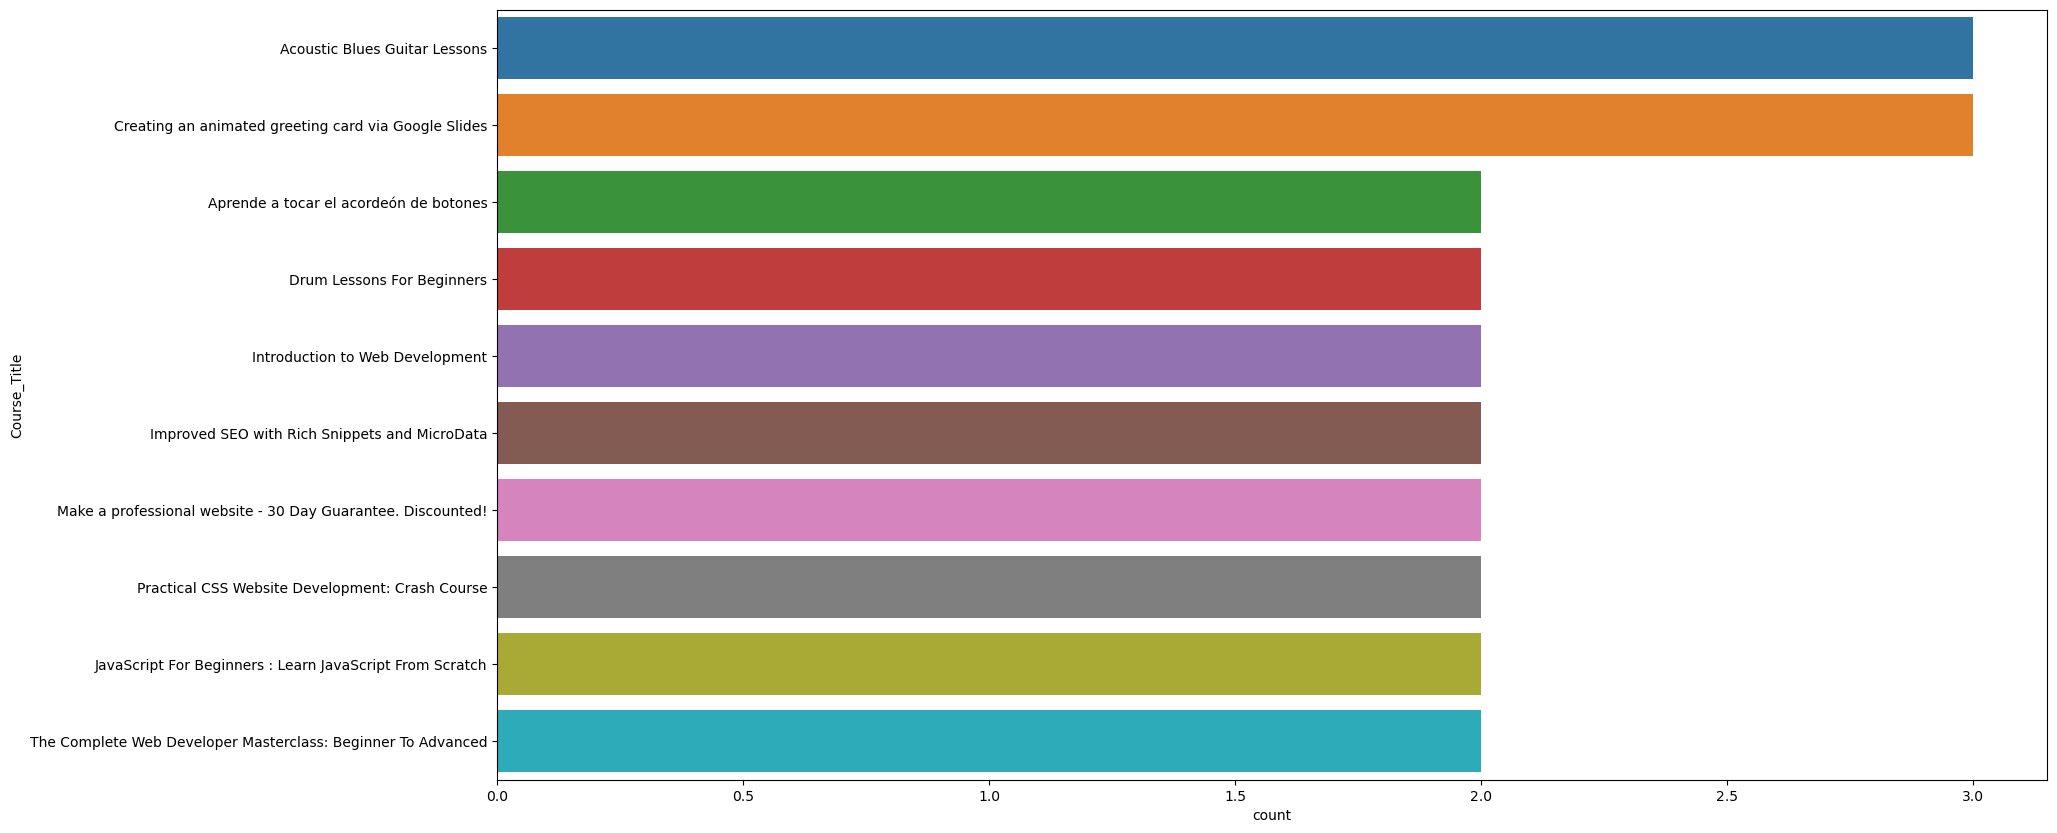

In [6]:
plt.figure(figsize=(20,10))

topten=df['Course_Title'].value_counts().head(10)

sns.countplot(y='Course_Title',data=df, order=topten.index);


Due to the numerous Course titles, lets focus on the top 10 counts.8 out of the 10 top course titles fall under the Web Development, seems most learners have a preference for Web Development. Though there are 1 course title in Musical Instruments and Graphics Design respectively.

In [16]:
#Convert the data column into a pandas datetime object
df['Date_Published']= pd.to_datetime(df['Date_Published'])

#Extract the Year,Month,Quarter
df['Year_Published']=df['Date_Published'].dt.year
df['Month_Published']=df['Date_Published'].dt.month
df['Month_name']=df['Date_Published'].dt.month_name()
df['quarter']=df['Date_Published'].dt.quarter

df.head(5)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Revenue,Year_Published,Month_Published,Month_name,quarter
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,0,2013,4,April,2
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,0,2013,4,April,2
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,2013-12-25,Free,0,2013,12,December,4
3,151668,29167,Introduction to Financial Modeling,0,1463,8,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,2014-05-27,Free,0,2014,5,May,2
4,648826,24481,The Complete Financial Analyst Course 2017,195,2347,174,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,2016-01-21,Paid,4773795,2016,1,January,1


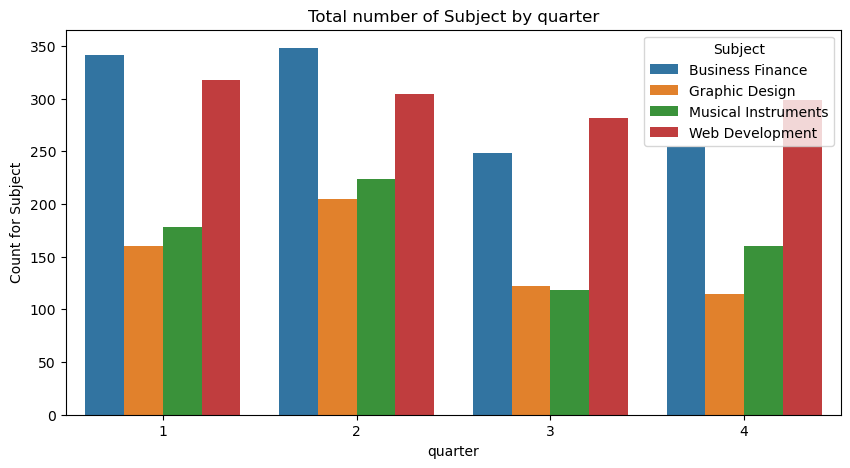

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='quarter',data=df,hue='Subject')
plt.xlabel('quarter')
plt.ylabel('Count for Subject')
plt.title('Total number of Subject by quarter');

The 1st and 2nd quarter seem to have had the higest count of learners with Business Finance and Web development respectively. The 3rd qurater had Graphic Design and Musical Instrument having the lowest counts, followed by the 4th quarter.More marketing campaigns would be highly recommended like adverts on social media, digital marketing  to get more learners aware of Edsigh Tech.

In [ ]:
MULTIVARIATE ANALYSIS

In [18]:
#Revenue Calculation
df['Revenue']=df['Price']*df['Num_Subscribers']


df.head(5)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,Revenue,Year_Published,Month_Published,Month_name,quarter
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,0,2013,4,April,2
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,0,2013,4,April,2
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,2013-12-25,Free,0,2013,12,December,4
3,151668,29167,Introduction to Financial Modeling,0,1463,8,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,2014-05-27,Free,0,2014,5,May,2
4,648826,24481,The Complete Financial Analyst Course 2017,195,2347,174,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,2016-01-21,Paid,4773795,2016,1,January,1


In [19]:
#Revenue against Year Published
Rev_yr =df.groupby('Year_Published')['Revenue'].sum().reset_index()
Rev_yr

,Year_Published,Revenue
0,2011,11643420
1,2012,11773470
2,2013,69405820
3,2014,107162385
4,2015,314510395
5,2016,277694340
6,2017,92970175


In [15]:
#Revenue,price,number of subscribers against Year Published
Revpr_yr =df.groupby('Year_Published')[['Revenue','Price','Num_Subscribers']].sum().reset_index()
Revpr_yr

,Year_Published,Revenue,Price,Num_Subscribers
0,2011,11643420,310,119028
1,2012,11773470,1835,555339
2,2013,69405820,10785,1680153
3,2014,107162385,23800,1952599
4,2015,314510395,67830,3475324
5,2016,277694340,84260,2977814
6,2017,92970175,54220,1000226


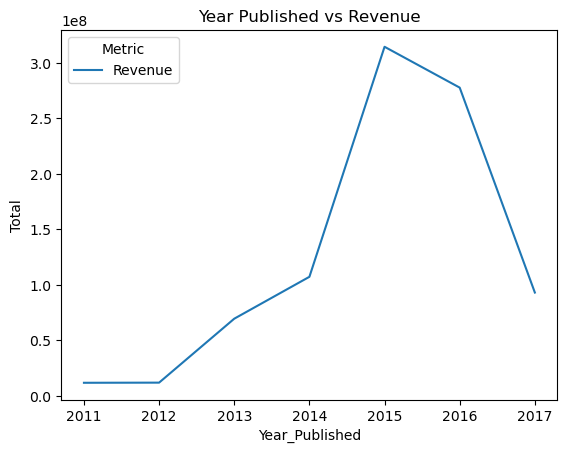

In [23]:
Revpr_yr =df.groupby('Year_Published')[['Revenue']].sum().reset_index()
Revpr_yr=pd.melt(Revpr_yr, id_vars='Year_Published',var_name='Metric',value_name='Total')
sns.lineplot(data=Revpr_yr,x='Year_Published',y='Total',hue='Metric')
plt.title('Year Published vs Revenue');


Looking at the revenue over the years, frm 2011 to 2012 the early years of the business there was a stagnation of 0.1, and frm 2012-2014 there was a significant growth frm 0.1 to 1.1, from 2014 to 2015 ther was a huge spike in its revenue from 1.1 to 3.0 its all time high, then in 2015 to 2016 there was a slight decline from 3,0 to 2.2, and later part of 2016 to 2017 a drastic decline in their revenue from bout 2.2 to abt 1.0.

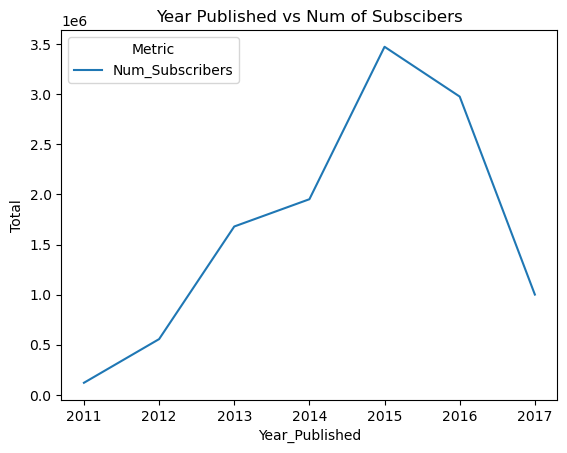

In [24]:
Revpr_yr =df.groupby('Year_Published')[['Num_Subscribers']].sum().reset_index()
Revpr_yr=pd.melt(Revpr_yr, id_vars='Year_Published',var_name='Metric',value_name='Total')
sns.lineplot(data=Revpr_yr,x='Year_Published',y='Total',hue='Metric')
plt.title('Year Published vs Num of Subscibers');



There was an increase in subscribers frm the 1st year 2011-2012, though it didnt reflect in the revenue frm 2011 to 2012 there might have been a lot of free classes given.The subscribers kept increasing from 2012-2015. The later part of 2015 to 2017 the subscribers have been declining

In [26]:
Revpr_yr

,Year_Published,Metric,Total
0,2011,Revenue,11643420
1,2012,Revenue,11773470
2,2013,Revenue,69405820
3,2014,Revenue,107162385
4,2015,Revenue,314510395
5,2016,Revenue,277694340
6,2017,Revenue,92970175
7,2011,Price,310
8,2012,Price,1835
9,2013,Price,10785


In [19]:
#Price against Year Published
Price_yr =df.groupby('Year_Published')['Price'].sum().reset_index()
Price_yr

,Year_Published,Price
0,2011,310
1,2012,1835
2,2013,10785
3,2014,23800
4,2015,67830
5,2016,84260
6,2017,54220


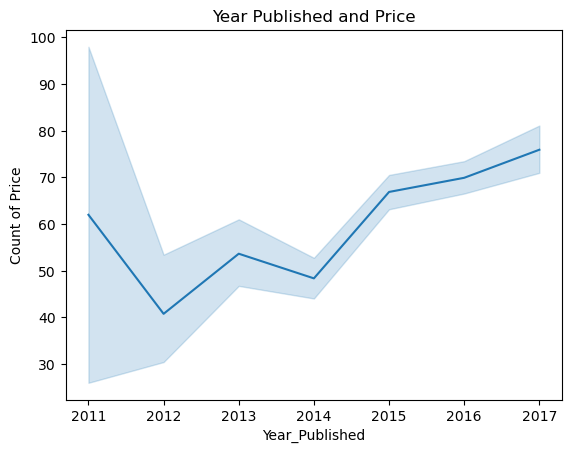

In [42]:
sns.lineplot(x='Year_Published',y='Price',data=df)
plt.xlabel('Year_Published')
plt.ylabel('Count of Price')
plt.title('Year Published and Price');

From inception 2011 uo till 2012, the price count dropped to attract learners since they were new in the market. In 2012 it went back up to about 55 price count, then came down from 2013 -2014. It can be noticed that despite the price decrease from 2011- 2014 ,the number of subscribers still increased.From 2014 -2015, despite the increase in price count from 50 to abt 65, the number of subscribers still increased. Also from 2016 to 2017, with the price count increase the number of subscribers declined drastically. 

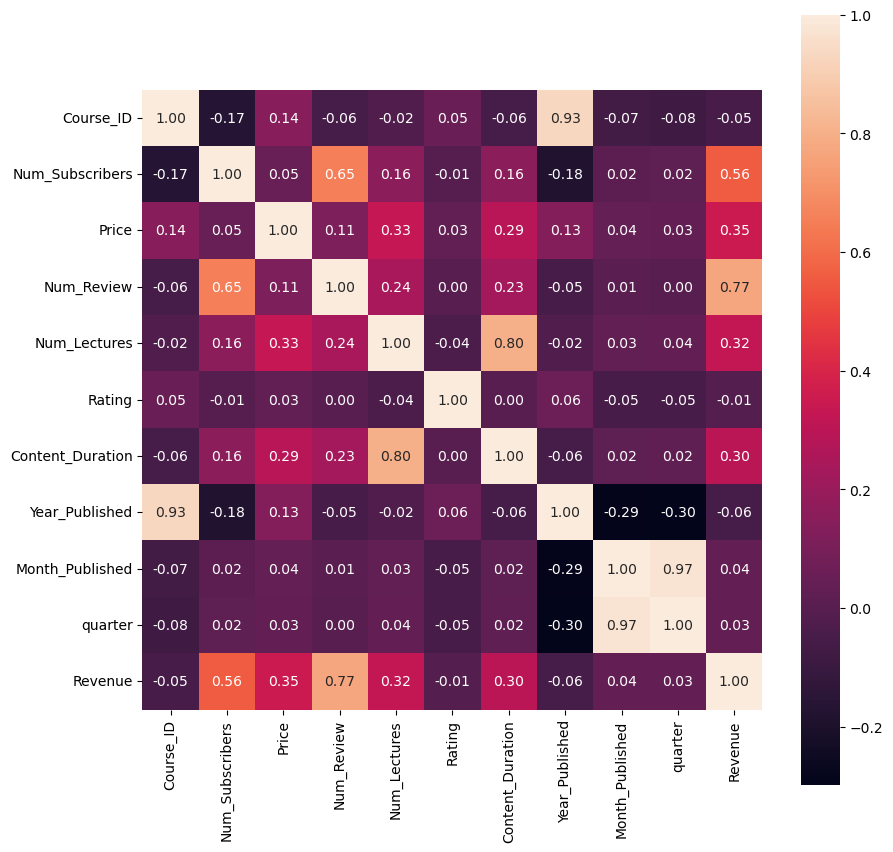

In [11]:
plt.figure(figsize=(10,10))

hm = sns.heatmap(df.corr(), cbar=True,annot=True, square=True,fmt='.2f',
                annot_kws={'size':10})

The heatmap shows both negative and positive correlations in the various features. The correlation btw Price and number of subscribers is at 0.05 which is quite weak.
Month Published and quarter had the strongest correlation of 0.97, then Course Id and year have a correlation of 0.93, also number of lectures and content duration have a correlation of 0.8

Recommendation
In leveraging the data to gain insights and improve efficiency in Edsigh Ed-Tech, a few recommendations can be given
Edsigh Ed Tech seems to be known for their tech courses . The Web development subject did better than the others and learners gave a good rating for it, also the learners didnt really mind the price of the courses, rather they seemed to be more on the value. Majority of the learners are from all levels and beginner stage. There were a number of Course titles under the 4 main subjects and from using the top 10 course titles,it was deduced that 8 titles were under the Web Development  
I will recommend that Edsigh Tech develops more tech courses/subjects like Data Science, Data Analysis and so many more to help increase their subscribers as well as revenue.

Secondly, I will recommend that a marketing campaign budget be used for aggressive marketing online that is well targeted on major online platforms for prospective learners to know about Edsigh Ed Tech, then a free trial class can be given after which learners begin to pay for the classes. From their data, the paid classes of 3365 learners dominated the free classes of 311 learners, which shows subscribers are ready and willing to pay for value. There has to be an increase in the subscribers to impact on the revenue.

The relationship btw the revenue, number of subscibers ,price with the Year Published
Both the revenue and the number of subscribers are positively correlated, the higher the subscribers are the more revenue is made on a yearly basis.For the future survival of Edsigh Ed Tech they must get more learners subscribe to the subjects. Through advertising, referals from their existing learners with some form of benefit for both parties. Get discounts,gifts,freebies for every 2 referals the existing learners introduce.

The relationship btw the price and the number of subscribers, is not dependent of each other, in 2012 and 2014 when prices came down, the number of subscribers for both years increased significantly from 0.5 to 2. Learners are willing to pay the price set, whether higher or lower as long as they can get value for the courses. The price can also be reviewed upwards and benchmarked with other Ed Tech schools to be sure the price is competitive enough to increase their revenue, and most importantly more value on the courses should be given, within the short content duration of max of 50-60 mins.
